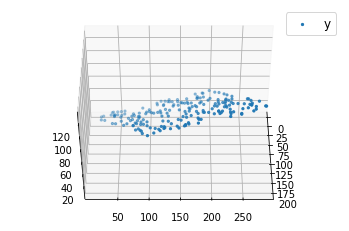

In [1]:
import numpy as np 
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 

def generate_dataset(n): 
    x = [] 
    y = [] 
    random_x1 = np.random.rand() 
    random_x2 = np.random.rand() 
    for i in range(n): 
        x1 = i 
        x2 = i/2 + np.random.rand()*n 
        x.append([1, x1, x2]) 
        y.append(random_x1 * x1 + random_x2 * x2 + 1) 
    return np.array(x), np.array(y) 

x, y = generate_dataset(200) 
  
mpl.rcParams['legend.fontsize'] = 12
  
fig = plt.figure() 
ax = fig.gca(projection ='3d') 
  
ax.scatter(x[:, 1], x[:, 2], y, label ='y', s = 5) 
ax.legend() 
ax.view_init(45, 0) 
  
plt.show() 

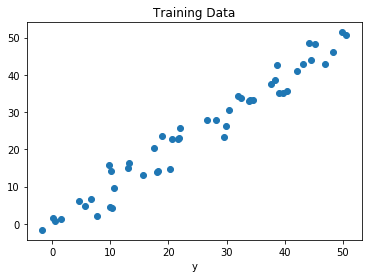

In [2]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
np.random.seed(101) 
tf.random.set_seed(101) 
# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 
  
# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 
  
n = len(x) # Number of data points
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

In [3]:
pip install tensorflow==1.4

ERROR: Could not find a version that satisfies the requirement tensorflow==1.4 (from versions: 1.13.0rc1, 1.13.0rc2, 1.13.1, 1.13.2, 1.14.0rc0, 1.14.0rc1, 1.14.0, 1.15.0rc0, 1.15.0rc1, 1.15.0rc2, 1.15.0rc3, 1.15.0, 1.15.2, 1.15.3, 2.0.0a0, 2.0.0b0, 2.0.0b1, 2.0.0rc0, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.0.2, 2.1.0rc0, 2.1.0rc1, 2.1.0rc2, 2.1.0, 2.1.1, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0)
ERROR: No matching distribution found for tensorflow==1.4
Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
X = tf.placeholder("float") 
Y = tf.placeholder("float") 
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 
learning_rate = 0.01
training_epochs = 1000
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 

# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

# Global Variables Initializer 
init = tf.global_variables_initializer() 
# Starting the Tensorflow Session 
with tf.Session() as sess: 
	
	# Initializing the Variables 
	sess.run(init) 
	
	# Iterating through all the epochs 
	for epoch in range(training_epochs): 
		
		# Feeding each data point into the optimizer using Feed Dictionary 
		for (_x, _y) in zip(x, y): 
			sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
		
		# Displaying the result after every 50 epochs 
		if (epoch + 1) % 50 == 0: 
			# Calculating the cost a every epoch 
			c = sess.run(cost, feed_dict = {X : x, Y : y}) 
			print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
	
	# Storing necessary values to be used outside the Session 
	training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
	weight = sess.run(W) 
	bias = sess.run(b) 
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 


Instructions for updating:
non-resource variables are not supported in the long term
Epoch 50 : cost = 5.8868036 W = 0.9951241 b = 1.238105
Epoch 100 : cost = 5.79127 W = 0.99812365 b = 1.0914395
Epoch 150 : cost = 5.7119684 W = 1.0008028 b = 0.96044284
Epoch 200 : cost = 5.6459413 W = 1.0031956 b = 0.84343934
Epoch 250 : cost = 5.5907993 W = 1.0053328 b = 0.7389355
Epoch 300 : cost = 5.544608 W = 1.007242 b = 0.6455921
Epoch 350 : cost = 5.5057893 W = 1.008947 b = 0.56221986
Epoch 400 : cost = 5.473066 W = 1.01047 b = 0.48775342
Epoch 450 : cost = 5.445385 W = 1.0118302 b = 0.42124158
Epoch 500 : cost = 5.4219036 W = 1.0130452 b = 0.36183482
Epoch 550 : cost = 5.4019227 W = 1.0141305 b = 0.30877408
Epoch 600 : cost = 5.3848557 W = 1.0150996 b = 0.2613811
Epoch 650 : cost = 5.370246 W = 1.0159653 b = 0.21905078
Epoch 700 : cost = 5.3576994 W = 1.0167387 b = 0.18124203
Epoch 750 : cost = 5.3468933 W = 1.0174294 b = 0.14747237
Epoch 800 : cost = 5.337558 W = 1.0180461 b = 0.11730931
Epoc

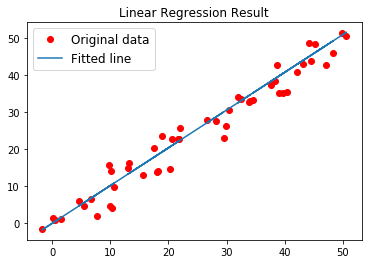

In [7]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 